# Projeto 1 "Online Retail"

Dataset disponibilizado pela UC Irvine Macbine Leaning Repository em https://archive.ics.uci.edu/dataset/352/online+retail

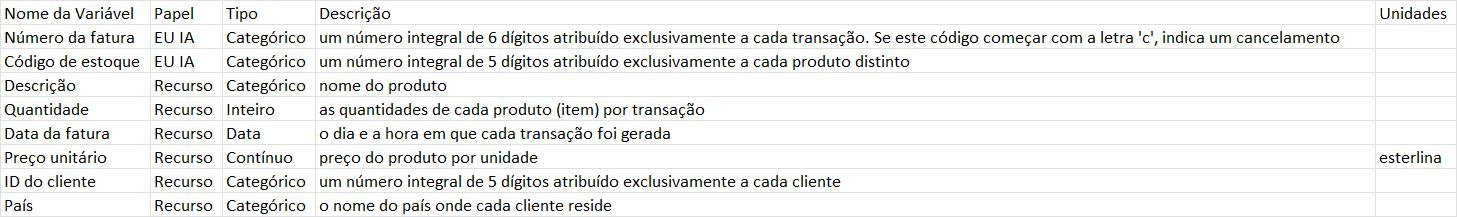

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import time

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
#Importação de dados
start_1 = time.time()
df = pd.read_excel('Online+Retail.xlsx')
end_1 = time.time()
print("A execução 1 demorou: ", end_1 - start_1)   

A execução 1 demorou:  97.59551572799683


In [3]:
#Convertendo Coluna 'CustomerID' para objetc. 
df['CustomerID'] = df['CustomerID'].astype('object')
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [4]:
#Criação do SalesTotal
df['SalesTotals'] = round(df['Quantity']*df['UnitPrice'],1)

In [5]:
def remov_out(df): 
    df_copy = df.copy()
    lista_col = df_copy.select_dtypes(include=['float64', 'int64']).columns
    
    for col in lista_col:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        
        # Calculando o IQR (InterQuartile Range)
        IQR = Q3 - Q1

        # Definindo os limites para identificar outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrando com base nos limites
        df_copy = df_copy[(df_copy[col] >= limite_inferior) & (df_copy[col] <= limite_superior)]
        
        # Exibindo as informações de quantis para cada coluna
        print(f'| Coluna: {col} | Quantile 25%: {Q1} | Quantile 75%: {Q3}')
    
    return df_copy

df = remov_out(df)
remov_out(df)
print(df.min())


| Coluna: Quantity | Quantile 25%: 1.0 | Quantile 75%: 10.0
| Coluna: UnitPrice | Quantile 25%: 1.25 | Quantile 75%: 4.15
| Coluna: SalesTotals | Quantile 25%: 3.2 | Quantile 75%: 15.3
| Coluna: Quantity | Quantile 25%: 1.0 | Quantile 75%: 6.0
| Coluna: UnitPrice | Quantile 25%: 1.25 | Quantile 75%: 3.75
| Coluna: SalesTotals | Quantile 25%: 2.6 | Quantile 75%: 15.0
Quantity                       -12
InvoiceDate    2010-12-01 08:26:00
UnitPrice                      0.0
CustomerID                 12347.0
Country                  Australia
SalesTotals                  -14.9
dtype: object


In [6]:
df = df.copy()

# Criando a coluna 'MonthYear' corretamente no formato YYYY-MM
df['MonthYear'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# Mantendo 'Year' como número inteiro
df['Year'] = df['InvoiceDate'].dt.year

# Mantendo 'Month' como número inteiro
df['Month'] = df['InvoiceDate'].dt.month

# Visualizando os tipos de dados para conferir
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
SalesTotals           float64
MonthYear              object
Year                    int64
Month                   int64
dtype: object

In [7]:
#Vizualização data frame
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesTotals,MonthYear,Year,Month
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.2,2011-12,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.6,2011-12,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.6,2011-12,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.6,2011-12,2011,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.8,2011-12,2011,12


In [8]:
#DataSet Filtrando 'c' Cancelados
df_cancelados = df[df['InvoiceNo'].str.startswith('C', na=False)]
print('Total de Cancelamentos: ',len(df_cancelados))

#DataSet Filtrado Cancelados
df = df[~df['InvoiceNo'].isin(df_cancelados['InvoiceNo'])]
print('Total de Vendas Sem cancelamentos: ',len(df))
print('Percentual de Cancelamento: ', round(len(df_cancelados)/len(df),2),'%')

Total de Cancelamentos:  5498
Total de Vendas Sem cancelamentos:  426297
Percentual de Cancelamento:  0.01 %


In [9]:
#Percentual de NA's
((len(df) / df.count())-1).round(3)

InvoiceNo      0.000
StockCode      0.000
Description    0.002
Quantity       0.000
InvoiceDate    0.000
UnitPrice      0.000
CustomerID     0.367
Country        0.000
SalesTotals    0.000
MonthYear      0.000
Year           0.000
Month          0.000
dtype: float64

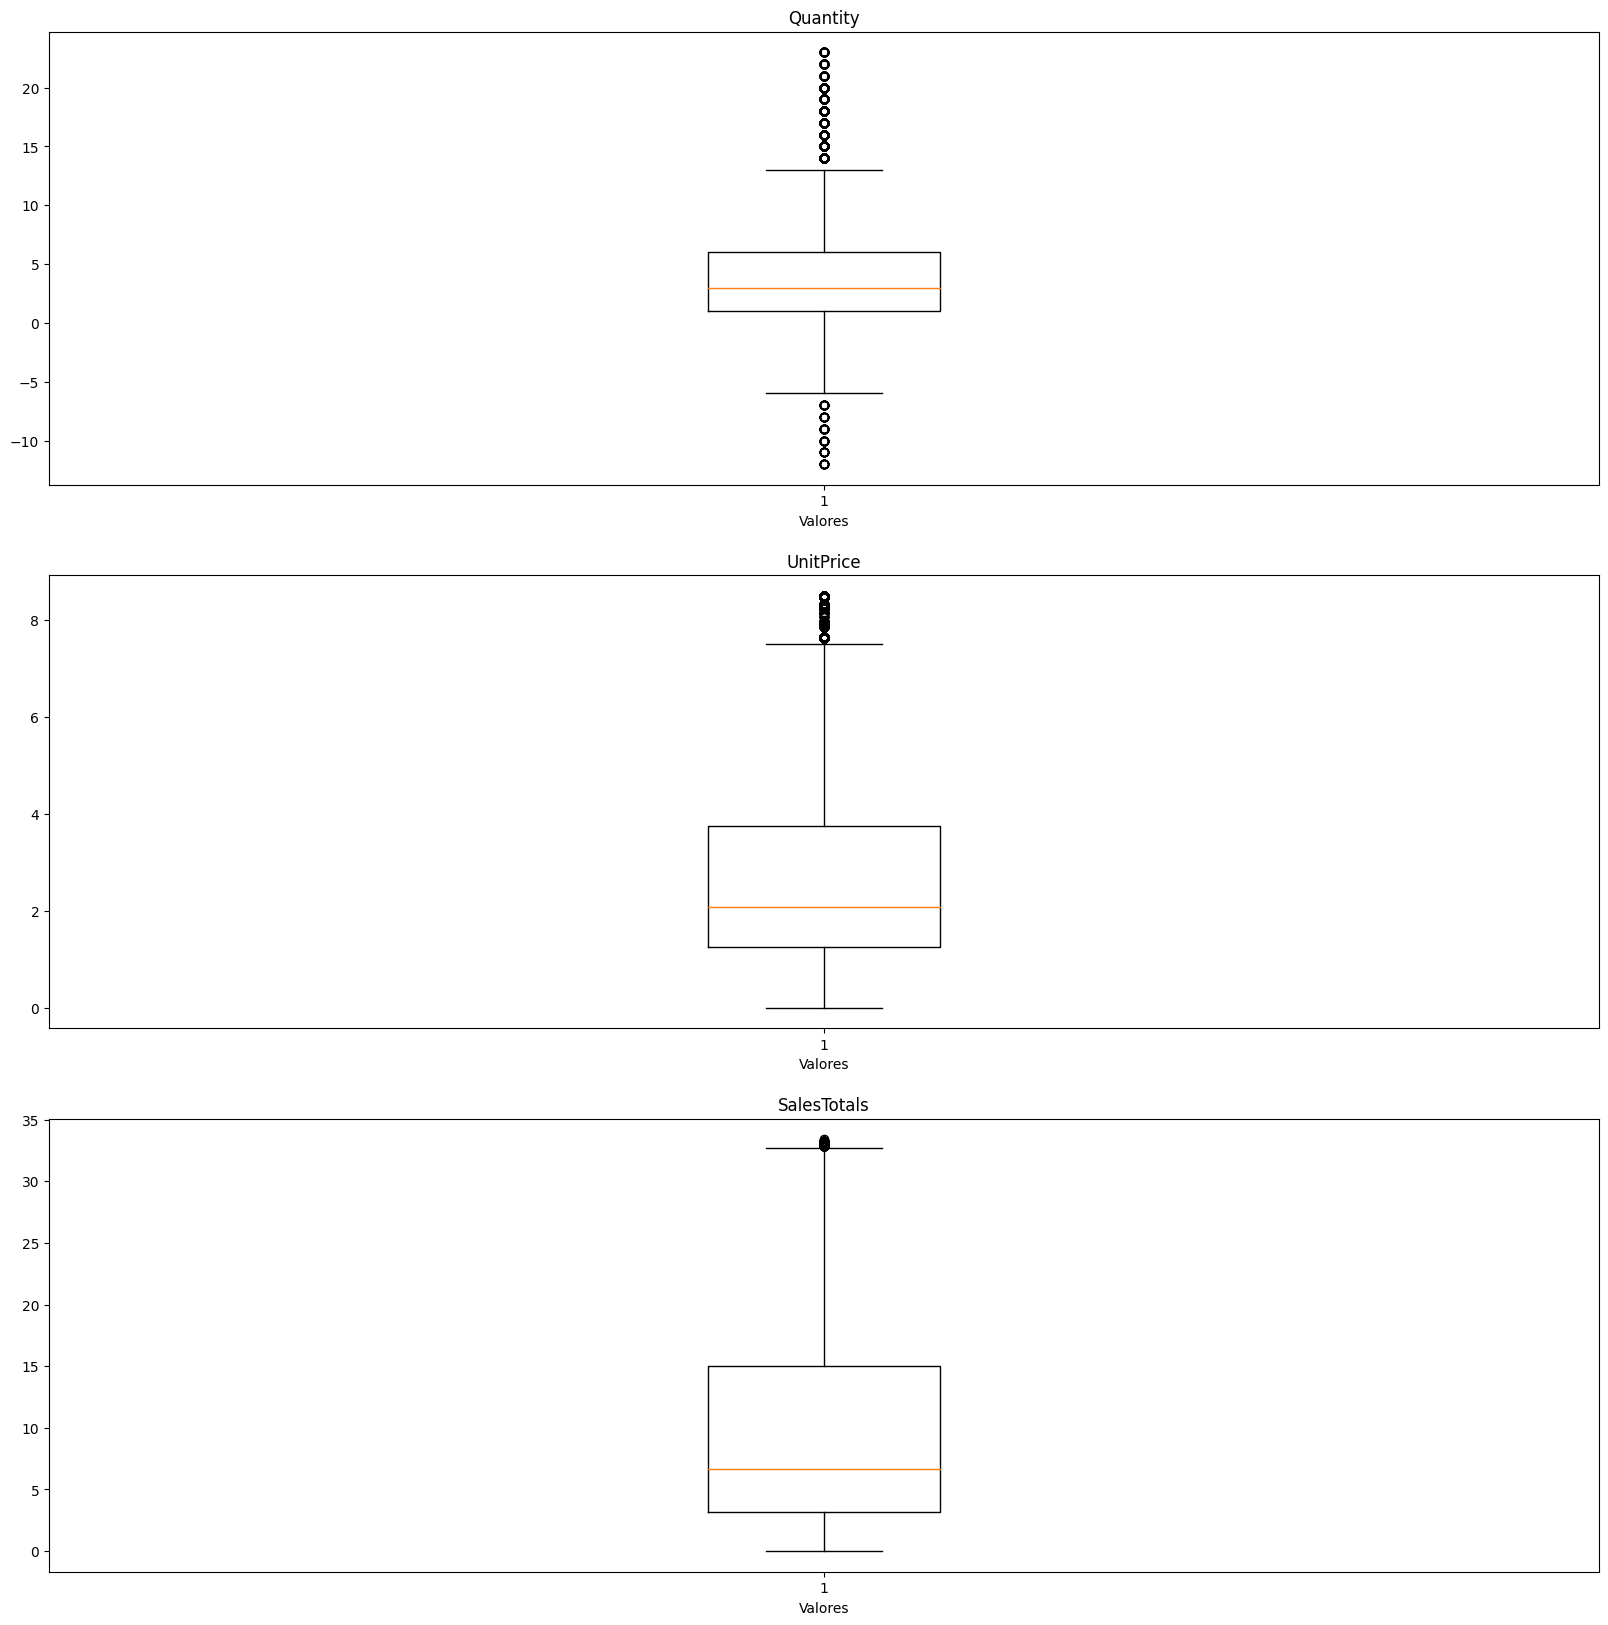

In [10]:
#BOX PLOT

colunas_numericas = df[['Quantity','UnitPrice','SalesTotals']].columns


plt.figure(figsize=(20,20))

for i,column  in enumerate(colunas_numericas):
    plt.subplot(len(colunas_numericas),1,i+1)
    plt.boxplot(df[column])
    plt.title(column)
    plt.xlabel('Valores')

#plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()  # Mostra os gráficos
    

In [11]:
corr_matrix = df[['Quantity','UnitPrice','SalesTotals']].corr()

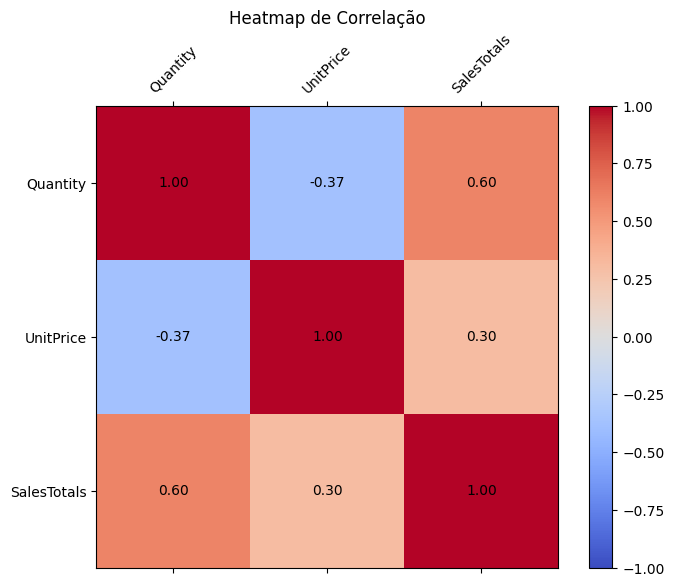

In [12]:
fig, ax7 = plt.subplots(figsize=(8,6))

coax = ax7.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(coax)

# Definindo os rótulos dos eixos
ax7.set_xticks(np.arange(len(corr_matrix.columns)))
ax7.set_yticks(np.arange(len(corr_matrix.columns)))
ax7.set_xticklabels(corr_matrix.columns)
ax7.set_yticklabels(corr_matrix.columns)

plt.xticks(rotation=45)

# Adicionando os valores numéricos dentro das células
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax7.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
        

        # Definindo o título do gráfico
plt.title('Heatmap de Correlação')

# Exibindo o gráfico
plt.show()


In [13]:
df.sort_values(by='UnitPrice', ascending=True).head(4000)
df.describe()

,Quantity,UnitPrice,SalesTotals,Year,Month
count,426297.000000,426297.000000,426297.000000,426297.000000,426297.000000
mean,4.603232,2.688950,9.222255,2010.921714,7.573370
std,4.265423,1.992455,7.427200,0.268621,3.519653
min,-12.000000,0.000000,0.000000,2010.000000,1.000000
25%,1.000000,1.250000,3.200000,2011.000000,5.000000
50%,3.000000,2.080000,6.700000,2011.000000,8.000000
75%,6.000000,3.750000,15.000000,2011.000000,11.000000
max,23.000000,8.500000,33.400000,2011.000000,12.000000


In [14]:
df2 = df.copy()

df2 = df2[df2['Quantity'] > 0]

# Processamento para utilizacap do Algoritmo Apriori
basket_UK = (df2[df2['Country'] == 'United Kingdom']
            .groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))
# One-Hot Encoding

def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

    # Encoding the datasets 
basket_encoded = basket_UK.applymap(hot_encode) 

basket_UK = basket_encoded

In [15]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules 

# Building the model 
frq_items_fp = fpgrowth(basket_UK, min_support = 0.01, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules_fp = association_rules(frq_items_fp, metric ="lift", min_threshold = 1) 

# Ordenar regras
rules_fp = rules_fp.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules_fp.head())

c:\users\geral\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                            antecedents  \
1236  (HERB MARKER CHIVES , HERB MARKER MINT, HERB M...   
1282  (HERB MARKER CHIVES , HERB MARKER MINT, HERB M...   
1268  (HERB MARKER ROSEMARY, HERB MARKER CHIVES , HE...   
1224        (HERB MARKER CHIVES , HERB MARKER ROSEMARY)   
1250           (HERB MARKER CHIVES , HERB MARKER THYME)   

                consequents  antecedent support  consequent support   support  \
1236  (HERB MARKER PARSLEY)            0.010318            0.013926  0.010191   
1282  (HERB MARKER PARSLEY)            0.010191            0.013926  0.010065   
1268  (HERB MARKER PARSLEY)            0.010571            0.013926  0.010381   
1224  (HERB MARKER PARSLEY)            0.011077            0.013926  0.010761   
1250  (HERB MARKER PARSLEY)            0.011014            0.013926  0.010698   

      confidence       lift  leverage  conviction  zhangs_metric  
1236    0.987730  70.927998  0.010047   80.365046       0.996180  
1282    0.987578  70.917

In [16]:
#rules_fp.to_excel("regras.xlsx", index=False)

In [17]:
import networkx as nx

In [18]:
top_10_rules = rules_fp.sort_values(by='lift', ascending=False).head(10)

# Converter os frozensets para strings legíveis corretamente
top_10_rules['antecedents'] = top_10_rules['antecedents'].apply(lambda x: ', '.join(map(str, x)))
top_10_rules['consequents'] = top_10_rules['consequents'].apply(lambda x: ', '.join(map(str, x)))

rule_top_10 = list(zip(top_10_rules['antecedents'],top_10_rules['consequents']))

confindence = list(top_10_rules['confidence'])
lift = list(top_10_rules['lift'])

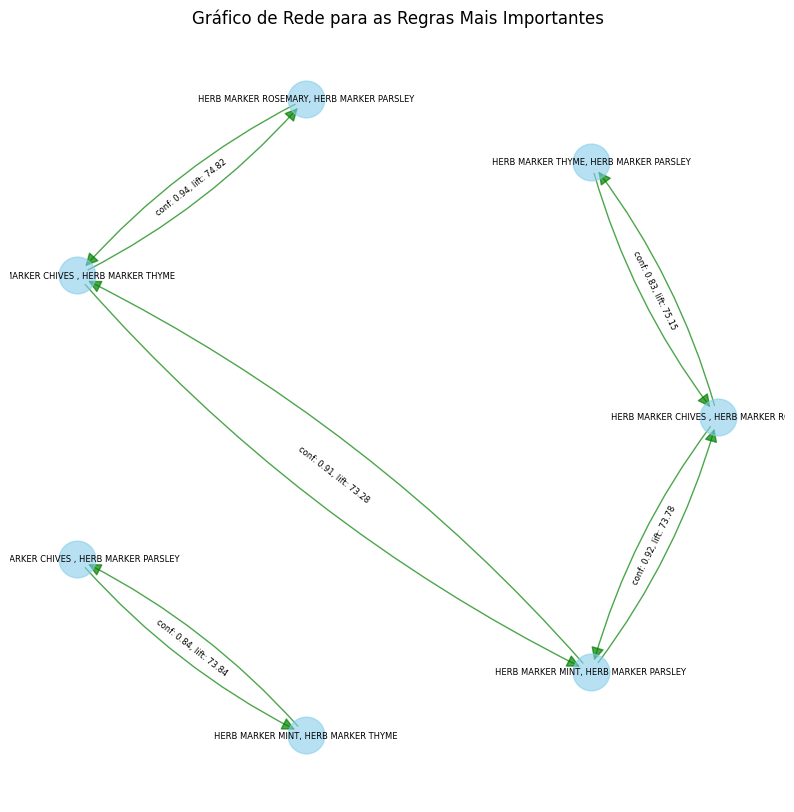

In [19]:
rule_top_10 = list(zip(top_10_rules['antecedents'], top_10_rules['consequents']))

G = nx.DiGraph()

# Adicionando todas as regras e atributos ao grafo
for i, rule in enumerate(rule_top_10):
    G.add_edge(rule[0], rule[1], confidence=confindence[i], lift=lift[i])

plt.subplots(figsize=(10, 10))

# Usando layout circular como teste para evitar problemas de posicionamento
pos = nx.circular_layout(G)

# Desenhando nós e arestas
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=6, font_color='black')

# Desenhar arestas com setas para indicar direções
nx.draw_networkx_edges(
    G, 
    pos, 
    edge_color='green', 
    alpha=0.7, 
    arrows=True, 
    arrowsize=20,  # Aumentar o tamanho das setas
    connectionstyle='arc3,rad=0.1'  # Suavizar as curvas para melhorar a visualização
)

# Criando labels para as arestas com confidence e lift
edge_labels = {
    (rule_top_10[i][0], rule_top_10[i][1]): f'conf: {confindence[i]:.2f}, lift: {lift[i]:.2f}' 
    for i in range(len(rule_top_10))
}

# Adicionando labels às arestas
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Gráfico de Rede para as Regras Mais Importantes")
plt.axis('off')
plt.show()



##################################################################################################################
# Desenhando o gráfico
#nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_color='black', edge_color='gray', alpha=0.7)

#plt.title("Gráfico de Rede para as 100 Regras Mais Importantes")
#plt.show()
###################################################################################################################

In [20]:
rule_top_10

[('HERB MARKER CHIVES , HERB MARKER ROSEMARY',
  'HERB MARKER THYME, HERB MARKER PARSLEY'),
 ('HERB MARKER THYME, HERB MARKER PARSLEY',
  'HERB MARKER CHIVES , HERB MARKER ROSEMARY'),
 ('HERB MARKER ROSEMARY, HERB MARKER PARSLEY',
  'HERB MARKER CHIVES , HERB MARKER THYME'),
 ('HERB MARKER CHIVES , HERB MARKER THYME',
  'HERB MARKER ROSEMARY, HERB MARKER PARSLEY'),
 ('HERB MARKER CHIVES , HERB MARKER PARSLEY',
  'HERB MARKER MINT, HERB MARKER THYME'),
 ('HERB MARKER MINT, HERB MARKER THYME',
  'HERB MARKER CHIVES , HERB MARKER PARSLEY'),
 ('HERB MARKER MINT, HERB MARKER PARSLEY',
  'HERB MARKER CHIVES , HERB MARKER ROSEMARY'),
 ('HERB MARKER CHIVES , HERB MARKER ROSEMARY',
  'HERB MARKER MINT, HERB MARKER PARSLEY'),
 ('HERB MARKER MINT, HERB MARKER PARSLEY',
  'HERB MARKER CHIVES , HERB MARKER THYME'),
 ('HERB MARKER CHIVES , HERB MARKER THYME',
  'HERB MARKER MINT, HERB MARKER PARSLEY')]